In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib import cm
from matplotlib import colors
import mplhep as hep
import coffea
from coffea.util import load
from coffea import hist
from coffea.hist import plot
import os
import numpy as np

In [2]:
#output = load("/work/mmarcheg/ttHbb/histograms/hists_dilepton_baseline_samples_t3local_2017_solvedmask.coffea")
output = load("/work/mmarcheg/ttHbb/histograms/hists_dilepton_splitdataset/hists_dilepton_splitdataset.coffea")
output

{'sumw': defaultdict_accumulator(float,
                         {'TTTo2L2Nu': 1297459807.6591163,
                          'ttHTobb': 4216319.381806612,
                          'TTToSemiLeptonic': 58863412070.57268}),
 'nevts': defaultdict_accumulator(int,
                         {'TTTo2L2Nu': 18000000,
                          'ttHTobb': 8000000,
                          'TTToSemiLeptonic': 195696537}),
 'nevts_solved': defaultdict_accumulator(int,
                         {'TTTo2L2Nu': 14468,
                          'ttHTobb': 4994,
                          'TTToSemiLeptonic': 363}),
 'hist_muons_pt_basic_weights_ones': <Hist (dataset,values) instance at 0x7fda39b5bf50>,
 'hist_muons_eta_basic_weights_ones': <Hist (dataset,values) instance at 0x7fda39b65790>,
 'hist_goodmuons_pt_basic_weights_ones': <Hist (dataset,values) instance at 0x7fda39b65a50>,
 'hist_goodmuons_eta_basic_weights_ones': <Hist (dataset,values) instance at 0x7fda39b65cd0>,
 'hist_electrons_pt_basic_weigh

In [3]:
histo = output['hist_leadAK8JetMass_basic_weights_ones']
keys = []
for item in histo.values().keys():
    keys.append(item[0])
    print(item[0])

TTTo2L2Nu
ttHTobb
TTToSemiLeptonic


In [10]:
masks = ['basic','boost','2l1b', '2l1bHbb', '2l2b','2l2bHbb','2l2bsolved','2l2bnotsolved','2l2blowdr',
         '2l2bmw','2l2bHbbmw','2l2bmwmt','2l2bHbbmwmt','2l2blowmt','2l2bhighmt']
weights = ['ones', 'nominal']

plt.style.use(hep.style.ROOT)

def get_keys(histo):
    
    keys = []
    for item in histo.values().keys():
        keys.append(item[0])
        
    return keys

def significance(histo, mass_range, signal='ttHTobb'):
    
    datasets = get_keys(histo)
    histo_sr = histo.rebin("values", hist.Bin("values", "var", np.arange(mass_range[0],mass_range[1],1)))
    
    S = 0
    B = 0
    
    for dataset in datasets:
        if dataset == signal:
            S += sum(list(histo_sr[dataset].values().items())[0][-1])
            #print("S =", S)
        else:
            B += sum(list(histo_sr[dataset].values().items())[0][-1])
            #print("B =", B)
    
    return S/np.sqrt(S+B)

In [11]:
significance(output['hist_leadAK8JetMass_basic_weights_nominal'], [70,200])

1.2793780040316012

In [12]:
sig = {}
for wn in weights:
    if wn == 'ones': continue
    d = {}
    for mask_name in masks:
        histo = output[f'hist_leadAK8JetMass_{mask_name}_weights_{wn}']
        s = significance(histo, [100,150])
        sig[mask_name] = s
        print(mask_name, "\t", s)

basic 	 1.2498337233842975
boost 	 1.8246477282231415
2l1b 	 1.4489616577778928
2l1bHbb 	 2.655882978349569
2l2b 	 1.3170357694040127
2l2bHbb 	 2.757263330597182
2l2bsolved 	 1.1278601831317052
2l2bnotsolved 	 0.6800850413524037
2l2blowdr 	 0.6800850413524037
2l2bmw 	 0.7633168254481679
2l2bHbbmw 	 1.8478916968481254
2l2bmwmt 	 0.5705171644273128
2l2bHbbmwmt 	 1.2268480121417042
2l2blowmt 	 0.9333634624447862
2l2bhighmt 	 0.9367793095909175


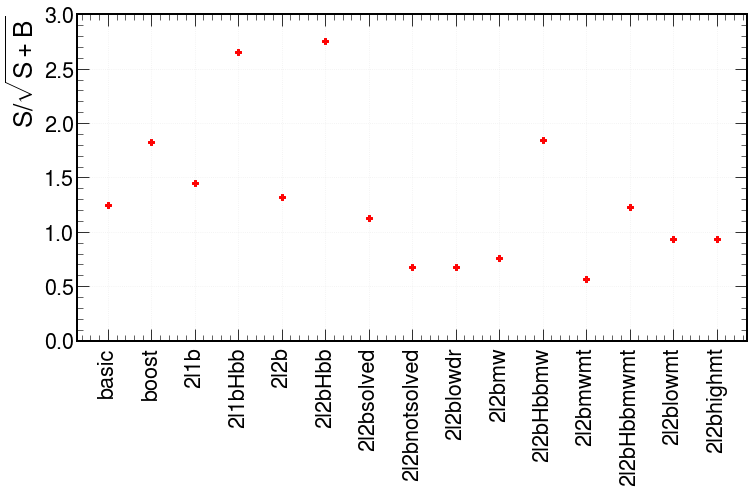

In [18]:
fig = plt.figure(figsize=[12,6])
plt.scatter(sig.keys(), sig.values(), marker="P", color="red")
plt.xticks(rotation='vertical')
plt.ylim(0, 3)
plt.ylabel(r"$S/\sqrt{S+B}$", rotation="vertical")
plt.grid(alpha=0.2)
#plt.yscale("log");
plt.savefig("plots/significance_dilepton_splitdataset.png", format="png", dpi=300)